In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle, datetime, tqdm, os, cmath
from scipy.optimize import curve_fit

In [2]:
def load_data(channel, sensor):
    path = "/eos/user/j/jcapotor/PDVDdata/fits/"
    data = pd.read_csv(fr"{path}CHANNEL_{channel}_{sensor}.csv", header=0)
    data["timestamp"] = pd.to_datetime(data["timestamp"], unit="s")
    dataP = data.loc[(data.index%2==True)]
    dataS = data.loc[(data.index%2==False)]
    dataP = dataP.set_index("timestamp")
    dataS = dataS.set_index("timestamp")
    return dataP, dataS


In [3]:
mapping = {
    0:{
        1:7100, 2:6600, 3:6100, 4:5600, 5:5100, 6:4600, 7:4100, 8:3600, 9:3100, 10:2600, 11:2100, 12:1600, 13:1100, 14:600
    },
    1:{
        1:7100, 2:4600, 3:2100
    },
    2:{
        1:7100, 2:4600, 3:2100
    },
    3:{
        1:7100, 2:6600, 3:6100, 4:5600, 5:5100, 6:4600, 7:4100, 8:3600, 9:3100, 10:2600, 11:2100, 12:1600, 13:1100, 14:600
    },
}

rtd_mapping = pd.read_csv("/afs/cern.ch/work/j/jcapotor/software/fbg/pdvd/mapping/mapping.csv", header=0)
print(rtd_mapping)

    Unnamed: 0          DCS-ID   SC-ID  CAL-ID     Y
0            0  47898968480539  TE0413   48899  7100
1            1  47898985257755  TE0414   48898  6600
2            2  47899002034971  TE0415   48897  6100
3            3  47899018812187  TE0416   48896  5600
4            4  47899035589403  TE0417   48895  5100
5            5  47899052366619  TE0418   48894  4600
6            6  47899069143835  TE0419   48893  4100
7            7  47899085921051  TE0420   48892  3600
8            8  47899102698267  TE0421   48891  3100
9            9  47899119475483  TE0422   48890  2600
10          10  47899136252699  TE0423   48889  2100
11          11  47899153029915  TE0424   48898  1600


/afs/cern.ch/work/j/jcapotor/software/fbg/pdvd/np02_data_processing/lib64/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/afs/cern.ch/work/j/jcapotor/software/fbg/pdvd/np02_data_processing/lib64/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


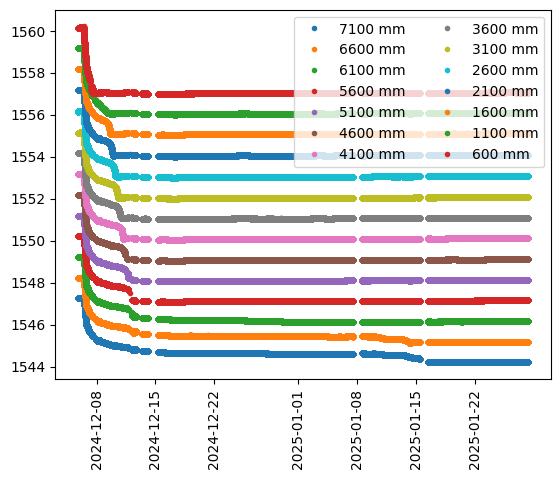

In [4]:
channel = 0
for sensor in mapping[channel].keys():
    ch1_1P, ch1_1S = load_data(channel, sensor)
    plt.plot(ch1_1P.index.to_numpy(), (ch1_1P["gbragg"]).to_numpy(), ".", label=fr"{mapping[channel][sensor]} mm")
plt.legend(ncol=2)
plt.xticks(rotation=90);

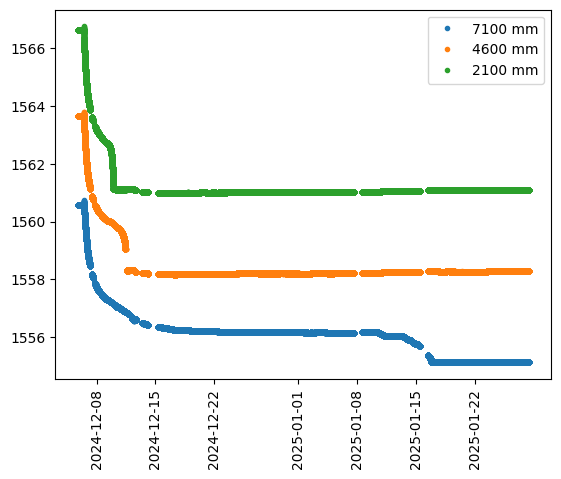

In [6]:
channel = 1
for sensor in mapping[channel].keys():
    ch1_1P, ch1_1S = load_data(channel, sensor)
    plt.plot(ch1_1P.index.to_numpy(), (ch1_1P["gbragg"]).to_numpy(), ".", label=fr"{mapping[channel][sensor]} mm")
plt.legend(ncol=1)
plt.xticks(rotation=90);

/tmp/jcapotor/ipykernel_2938311/639412952.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(ch1_1P.index.to_numpy(), (ch1_1P["gbragg"] - ch1_1P["gbragg"][0]).to_numpy(), ".", label=fr"{mapping[channel][sensor]} mm")
/tmp/jcapotor/ipykernel_2938311/639412952.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(ch1_1P.index.to_numpy(), (ch1_1P["gbragg"] - ch1_1P["gbragg"][0]).to_numpy(), ".", label=fr"{mapping[channel][sensor]} mm")
/tmp/jcapotor/ipykernel_2938311/639412952.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always 

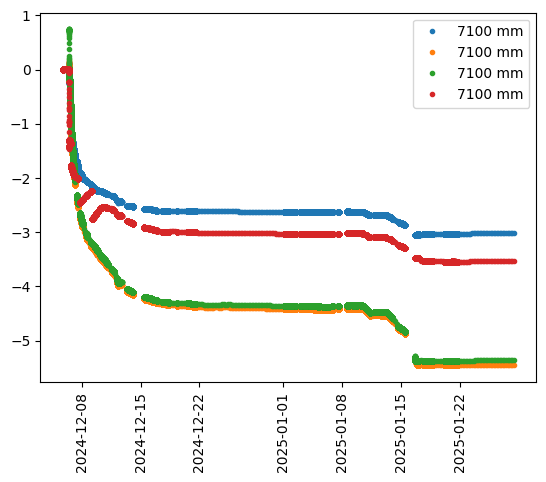

In [164]:
for channel in mapping.keys():
    for sensor in mapping[channel].keys():
        if mapping[channel][sensor] != 7100:
            continue
        ch1_1P, ch1_1S = load_data(channel, sensor)
        plt.plot(ch1_1P.index.to_numpy(), (ch1_1P["gbragg"] - ch1_1P["gbragg"][0]).to_numpy(), ".", label=fr"{mapping[channel][sensor]} mm")

plt.xticks(rotation=90);
plt.legend()


/tmp/jcapotor/ipykernel_2938311/4217183512.py:9: RuntimeWarning: invalid value encountered in sqrt
  yerr=np.sqrt(ch1_2P["gbragg_err"].to_numpy()**2 - ch1_3P["gbragg_err"].to_numpy()**2),


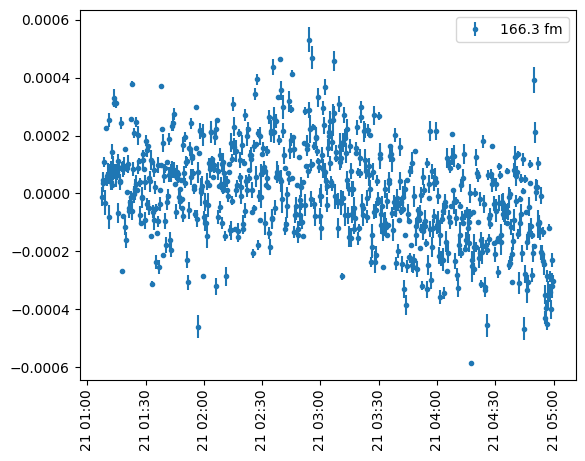

In [212]:
ch1_2P, ch1_2S = load_data(1, 3)
ch1_3P, ch1_3S = load_data(1, 2)

ch1_2P = ch1_2P.loc[(ch1_2P.index>datetime.datetime(2025, 1, 21))&(ch1_2P.index<datetime.datetime(2025, 1, 21, 5, 0, 0))]
ch1_3P = ch1_3P.loc[(ch1_3P.index>datetime.datetime(2025, 1, 21))&(ch1_3P.index<datetime.datetime(2025, 1, 21, 5, 0, 0))]

plt.errorbar(ch1_2P.index.to_numpy(),
         (ch1_2P["gbragg"].to_numpy() - ch1_3P["gbragg"].to_numpy()) - np.mean(ch1_2P["gbragg"].to_numpy() - ch1_3P["gbragg"].to_numpy()),
         yerr=np.sqrt(ch1_2P["gbragg_err"].to_numpy()**2 - ch1_3P["gbragg_err"].to_numpy()**2),
         fmt=".",
         label=fr'{1e6*(ch1_2P["gbragg"]-ch1_3P["gbragg"]).std():.1f} fm')
plt.legend()
plt.xticks(rotation=90);

/tmp/jcapotor/ipykernel_2938311/305709648.py:9: RuntimeWarning: invalid value encountered in sqrt
  yerr=np.sqrt(ch1_2P["gbragg_err"].to_numpy()**2 - ch1_3P["gbragg_err"].to_numpy()**2),


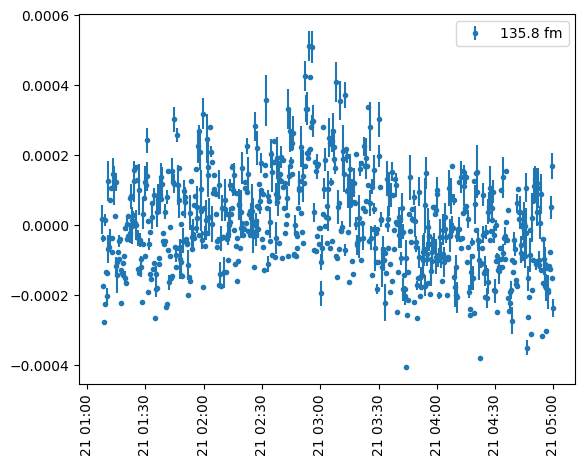

In [213]:
ch1_2P, ch1_2S = load_data(0, 11)
ch1_3P, ch1_3S = load_data(0, 6)

ch1_2P = ch1_2P.loc[(ch1_2P.index>datetime.datetime(2025, 1, 21))&(ch1_2P.index<datetime.datetime(2025, 1, 21, 5, 0, 0))]
ch1_3P = ch1_3P.loc[(ch1_3P.index>datetime.datetime(2025, 1, 21))&(ch1_3P.index<datetime.datetime(2025, 1, 21, 5, 0, 0))]

plt.errorbar(ch1_2P.index.to_numpy(),
         (ch1_2P["gbragg"].to_numpy() - ch1_3P["gbragg"].to_numpy()) - np.mean(ch1_2P["gbragg"].to_numpy() - ch1_3P["gbragg"].to_numpy()),
         yerr=np.sqrt(ch1_2P["gbragg_err"].to_numpy()**2 - ch1_3P["gbragg_err"].to_numpy()**2),
         fmt=".",
         label=fr'{1e6*(ch1_2P["gbragg"]-ch1_3P["gbragg"]).std():.1f} fm')
plt.legend()
plt.xticks(rotation=90);

Processing files: 100%|██████████| 10/10 [00:00<00:00, 84.93file/s]


Index(['Year/Month/Day Hour:Minute:Second.Millisecond', 'LT0501', 'LT0502',
       'LT0503', 'LT0504', 'LT0505', 'LT0506', 'LT0507', 'LT0508',
       'Unnamed: 9'],
      dtype='object')
Index(['Year/Month/Day Hour:Minute:Second.Millisecond', 'TE0414.PosSt',
       'Unnamed: 2'],
      dtype='object')
Index(['Year/Month/Day Hour:Minute:Second.Millisecond', 'TE0415.PosSt',
       'Unnamed: 2'],
      dtype='object')
Index(['Year/Month/Day Hour:Minute:Second.Millisecond', 'TE0416.PosSt',
       'Unnamed: 2'],
      dtype='object')
Index(['Year/Month/Day Hour:Minute:Second.Millisecond', 'TE0417.PosSt',
       'Unnamed: 2'],
      dtype='object')
Index(['Year/Month/Day Hour:Minute:Second.Millisecond', 'TE0418.PosSt',
       'Unnamed: 2'],
      dtype='object')
Index(['Year/Month/Day Hour:Minute:Second.Millisecond', 'TE0419.PosSt',
       'Unnamed: 2'],
      dtype='object')
Index(['Year/Month/Day Hour:Minute:Second.Millisecond', 'TE0421.PosSt',
       'Unnamed: 2'],
      dtype='object')
I

<Axes: xlabel='timestamp'>

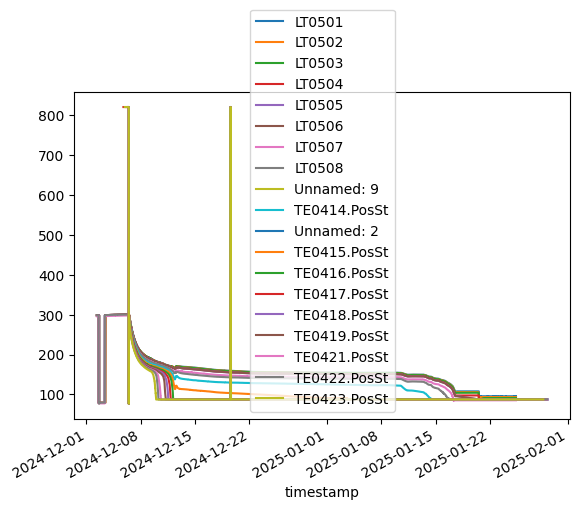

In [98]:
path = "/eos/user/j/jcapotor/PDVDdata/np02_rtd_data/"

ch0_1P, ch0_1S = load_data(0, 6)

rtd_data = pd.DataFrame()
for nfile, filename in enumerate(tqdm.tqdm(os.listdir(path), desc="Processing files", unit="file")):
    filename = fr"{path}{filename}"
    data = pd.read_csv(filename, skiprows=1, header=0)
    print(data.columns)
    data = data.rename(columns={"Year/Month/Day Hour:Minute:Second.Millisecond": "timestamp"})
    data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y/%m/%d %H:%M:%S.%f").astype(int) // 10**9
    data["timestamp"] = pd.to_datetime(data["timestamp"], unit="s")
    data = data.set_index("timestamp")
    rtd_data = pd.concat([rtd_data, data], ignore_index=False)

rtd_data.plot()


# rtd_data["Unnamed: 0"] = pd.to_datetime(rtd_data["Unnamed: 0"])
# rtd_data = rtd_data.set_index("Unnamed: 0")

Index(['LT0501', 'LT0502', 'LT0503', 'LT0504', 'LT0505', 'LT0506', 'LT0507',
       'LT0508', 'Unnamed: 9', 'TE0414.PosSt', 'Unnamed: 2', 'TE0415.PosSt',
       'TE0416.PosSt', 'TE0417.PosSt', 'TE0418.PosSt', 'TE0419.PosSt',
       'TE0421.PosSt', 'TE0422.PosSt', 'TE0423.PosSt'],
      dtype='object')
[99.75112988 99.31935349 98.96569342 98.6025992  98.23643799 97.85361167
 97.49193192 97.14070937 96.90605774 96.65507406 96.47881571 96.31866891
 96.20033264 96.05051041 95.9006958  95.83900833 95.75968933 95.62372044
 95.54818726 95.63630676 95.65393066 95.69623413 95.72443644]


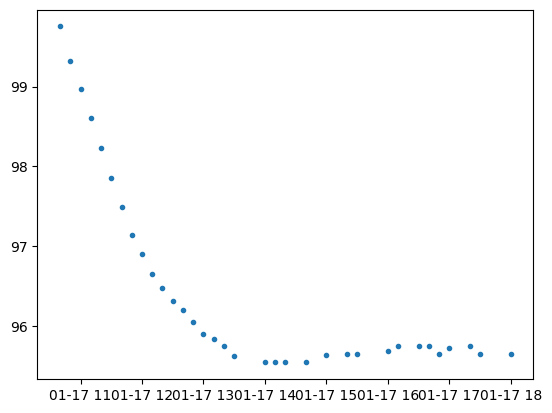

In [112]:
print(rtd_data.columns)
joined = pd.DataFrame()
joined = pd.concat([rtd_data, ch0_1P]).resample("10min").mean()
joined = joined.loc[(joined["LT0506"]<100)&(joined["LT0506"]>87.46 + 0.004)]
print(joined["LT0506"].unique())
plt.plot(joined.index, joined["LT0506"], ".")

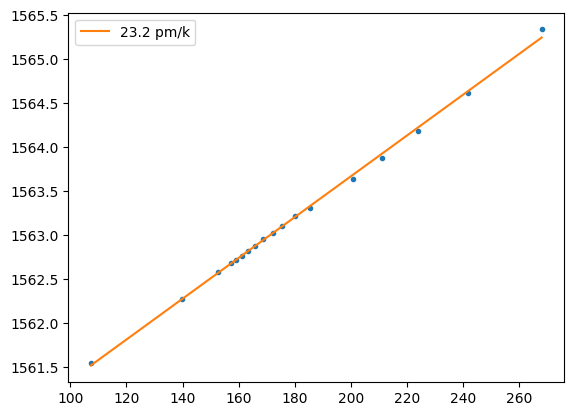

In [ ]:
def line(x, A, B):
    return A + B*x

data_fit = joined[["TE0423", "cbragg"]].resample("10min").mean().dropna()
plt.plot(data_fit["TE0423"].to_numpy(), data_fit["cbragg"].to_numpy(), ".")
popt, pcov = curve_fit(line, data_fit["TE0423"].dropna().to_numpy(), data_fit["cbragg"].dropna().to_numpy())
plt.plot(data_fit["TE0423"].to_numpy(), line(data_fit["TE0423"].to_numpy(), *popt), label=fr"{1e3*popt[1]:.1f} pm/k")
plt.legend()

In [162]:
results = {}
for channel in mapping.keys():
    for sensor in mapping[channel].keys():
        try:
            sc_id = rtd_mapping.loc[(rtd_mapping["Y"]==mapping[channel][sensor])]["SC-ID"].values[0]
            rtd_height = rtd_mapping.loc[(rtd_mapping["Y"]==mapping[channel][sensor])]["Y"].values[0]
            if rtd_height != mapping[channel][sensor]:
                continue
            chP, chS = load_data(channel, sensor)
            joinedP = pd.concat([rtd_data, chP], ignore_index=False)
            data_fitP = joinedP[[sc_id, "cbragg"]].resample("10min").mean().dropna()
            data_fitP = data_fitP.loc[(data_fitP[sc_id]<300)&(data_fitP[sc_id]>150)]
            popt, pcov = curve_fit(line, data_fitP[sc_id].dropna().to_numpy(), data_fitP["cbragg"].dropna().to_numpy())
            #print(channel, sensor, popt[1]*1e3)
            #plt.plot(data_fitP[sc_id].dropna().to_numpy(), line(data_fitP[sc_id].dropna().to_numpy(), *popt) - popt[0])
            results[fr"Ch{channel+1}_{sensor}"] = 1e3*popt[1]
        except:
            continue

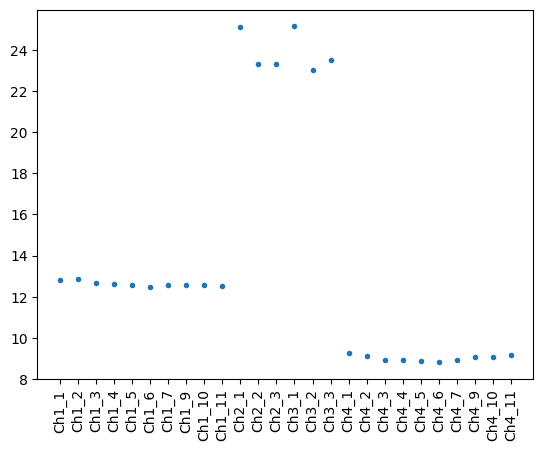

In [163]:
plt.plot(results.keys(), results.values(), ".")
plt.xticks(rotation=90);
